<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EC%8B%A4%EC%8A%B5/ADP%EC%8B%A4%EC%8A%B5_2%EC%A3%BC%EC%B0%A8_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D(%ED%86%B5%EA%B3%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

○ 군집분석

군집분석이란 데이터가 속해 있는 군집을 모르는 상태에서(Y값 label 없음) 유사한 혹은 동질의 데이터끼리 군집(cluster)로 묶어 주는 분석기법입니다.

군집분석은 데이터가 어떤 군집에 속해있는지 알 수 있는 Y값 Label이 없는 상태에서 진행된다고 하였으므로 지도학습(supervised learning)처럼 명쾌한 모델성능평가가 쉽지가 않습니다.  군집을 몇 개로 하느냐에 따라서도 군집화가 영향을 많이 받기도 하는데요, 보통은 데이터 내 군집이 몇 개 있는지 모르는 경우가 많습니다.

그렇다면 군집분석에서 모델 생성, 평가는 무슨 기준으로 하는 것일까 하는 의문이 들 것입니다. 군집분석에서는 주로 응집도(cohesion)과 분리도(separation) 척도를 많이 사용하는 편인데요, 군집분석을 컴퓨터가 이해하도록 수식, 척도를 가지고 군집화의 원리를 나타내보면

  (1) 군집 內 응집도를 최대화하고, (maximizing cohesion within cluster, i.e. minimizing sum of distance b/w x and y) 

&   (2) 군집 間 분리도를 최대화하도록 (maximizing separation between clusters)

군집을 형성한다는 것입니다.

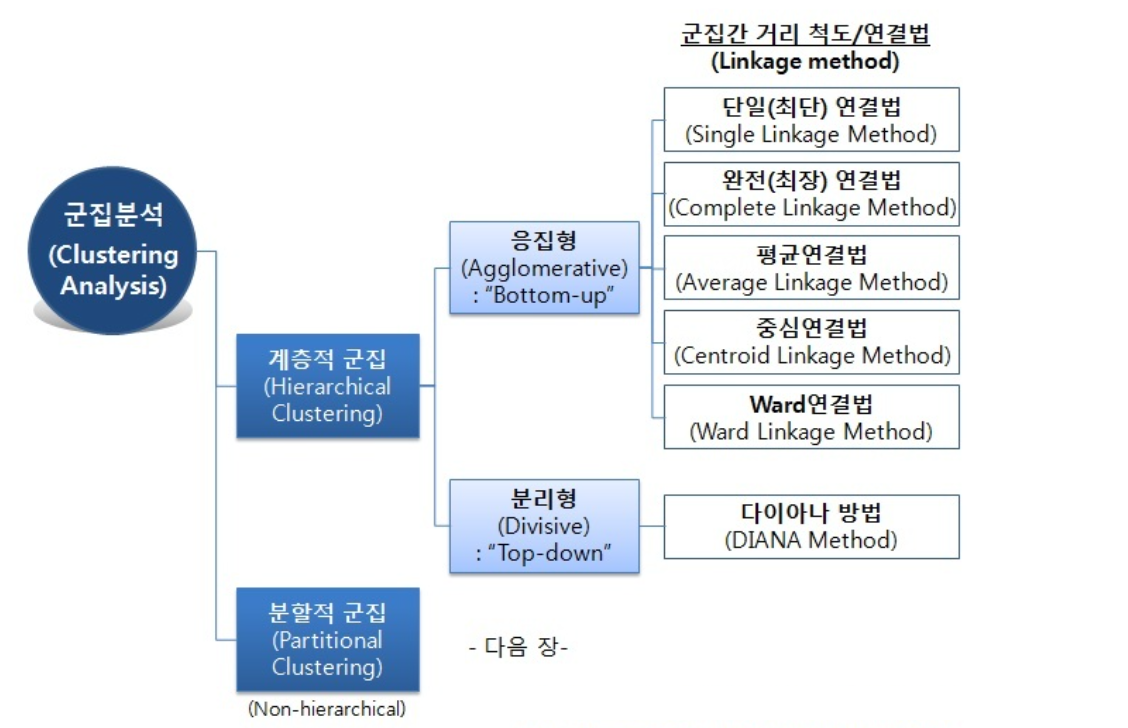

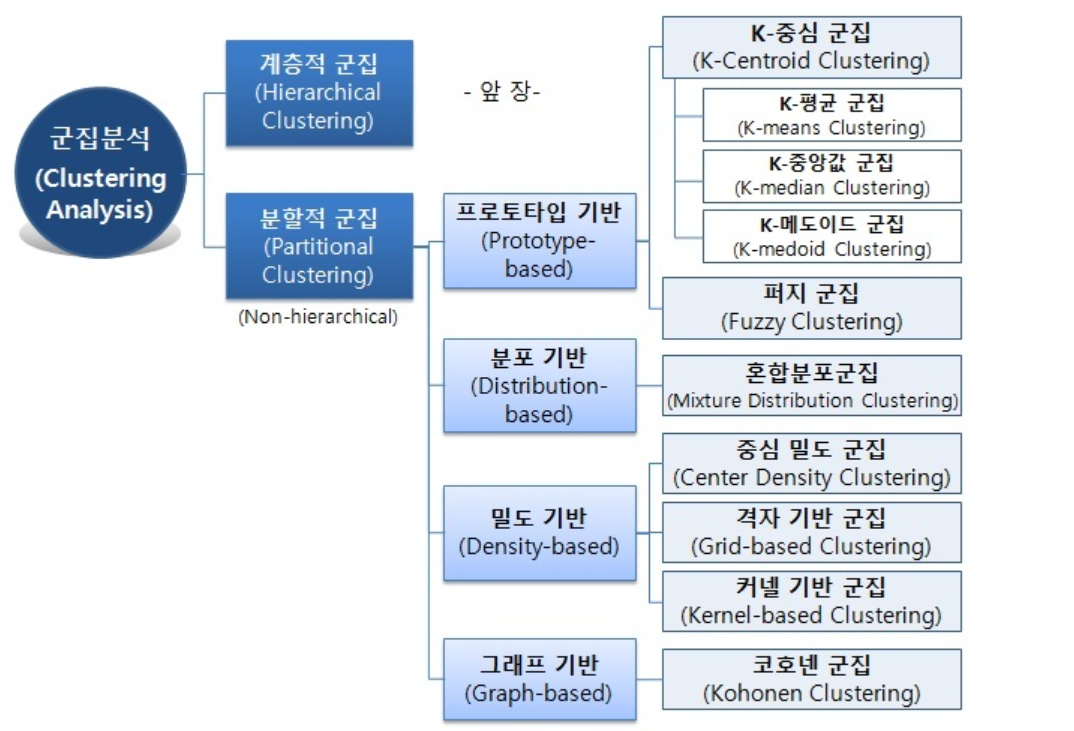

 1. 비계층적 클러스터링 K-means

K-means는 중심기반(Center-based) 클러스터링 방법으로 “유사한 데이터는 중심점(centroid)을 기반으로 분포할 것이다”는 가정을 기반으로 한다.

n개의 데이터와 k(<=n)개의 중심점(centroid)이 주어졌을때 각 그룹 내의 데이터와 중심점 간의 비용(거리)을 최소화하는 방향으로 계속 업데이트를 해줌으로써 그룹화를 수행하는 기법이다.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns=['Sepal length','Sepal width','Petal length','Petal width']
df = df[['Sepal length','Sepal width']].copy() 

df.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


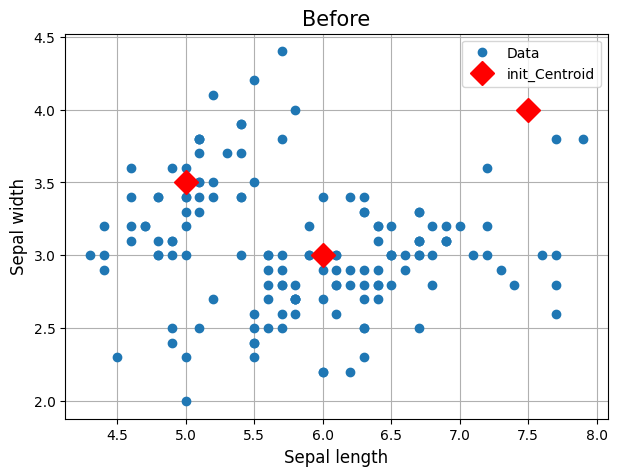

In [2]:
x1,y1 = 5, 3.5
x2,y2 = 6, 3
x3,y3 = 7.5, 4

plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df["Sepal length"], df["Sepal width"], "o", label="Data")
plt.plot([x1,x2,x3], [y1,y2,y3], "rD", markersize=12, label='init_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init=np.array([(x1,y1),(x2,y2),(x3,y3)])).fit(df)
df['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


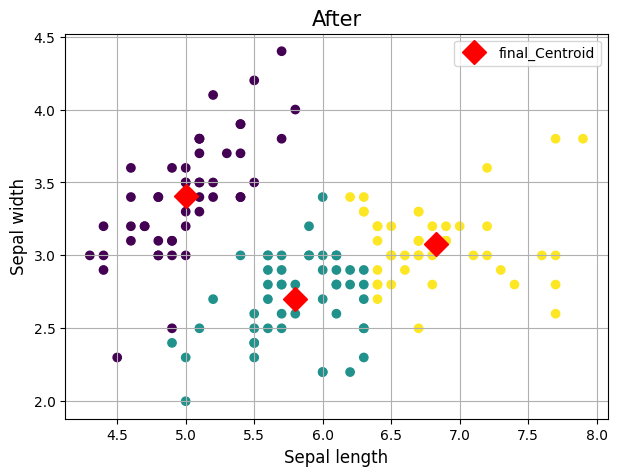

In [4]:
plt.figure(figsize=(7,5))
plt.title("After", fontsize=15)
plt.scatter(df['Sepal length'],df['Sepal width'],c=df['cluster'])
plt.plot(final_centroid[:,0], final_centroid[:,1], "rD", markersize=12, label='final_Centroid')
plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

2. DBSCAN

DBSCAN는 밀도기반(Density-based) 클러스터링 방법으로 “유사한 데이터는 서로 근접하게 분포할 것이다”는 가정을 기반으로 한다. K-means와 달리 처음에 그룹의 수(k)를 설정하지 않고 자동적으로 최적의 그룹 수를 찾아나간다.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=300, noise=0.05, random_state=42)
df=pd.DataFrame(x)
df.head()

,0,1
0,0.622519,-0.372101
1,1.904269,-0.136303
2,-0.069431,0.456117
3,0.933899,0.237483
4,1.180360,-0.490847


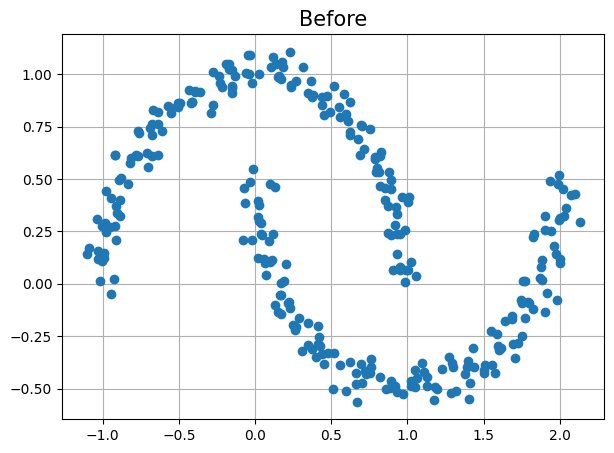

In [6]:
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df[0], df[1], "o")
plt.grid()
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.3, min_samples=5).fit(df.values)
df['cluster_db'] = db_scan.labels_

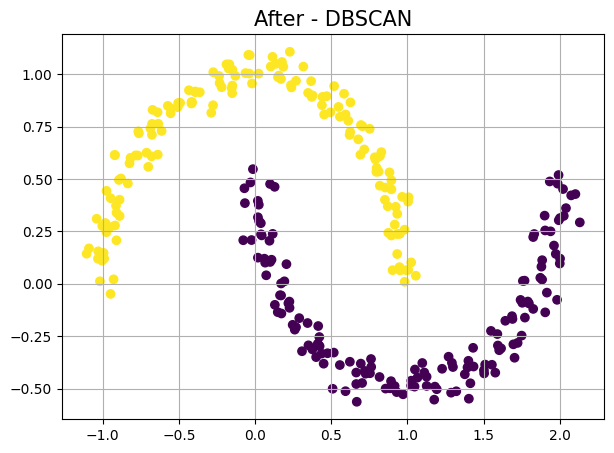

In [8]:
plt.figure(figsize=(7,5))
plt.title("After - DBSCAN", fontsize=15)
plt.scatter(df[0],df[1],c=df['cluster_db'])
plt.grid()
plt.show()

K-means와 DBSCAN 비교

와 동일한 Moon 데이터셋으로 KMeans를 활용해 작업을 수행해본 결과

In [9]:
from sklearn.cluster import KMeans
kmeans_ = KMeans(n_clusters=2, random_state=42).fit(df.values)
df['cluster_km'] = kmeans_.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


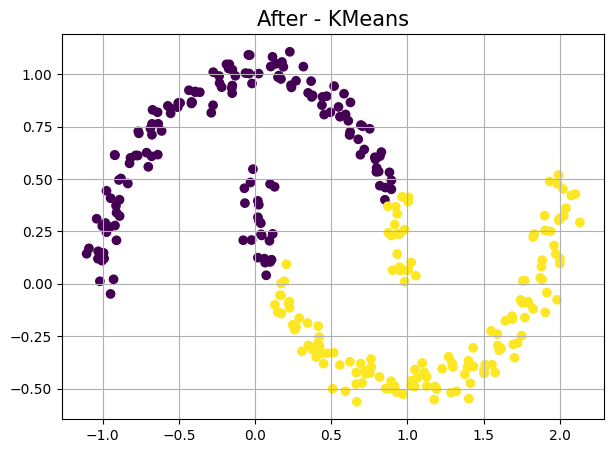

In [10]:
plt.figure(figsize=(7,5))
plt.title("After - KMeans", fontsize=15)
plt.scatter(df[0],df[1],c=df['cluster_km'])
plt.grid()
plt.show()

K-means

군집의 수(k)를 미리 결정
중심점(Centroid) 갱신을 통해 비용함수를 최적화
이상치에 영향을 많이 받음

DBSCAN

반경(eps), 최소 개체 수(minPts)를 미리 결정
자동적으로 군집의 수 결정
군집 간 개체들이 섞이지 않음(최소 반경 내에 한해서)
노이즈 개념으로 이상치 검출이 가능

3. 계층적 군집분석



In [11]:
#    1   2   3   4   5   6   7   8   9   10
x = [10, 12, 5,  10, 19, 28, 30, 1,  6,  7]
y = [12, 23, 13, 17, 16, 8,  16, 30, 20, 16]

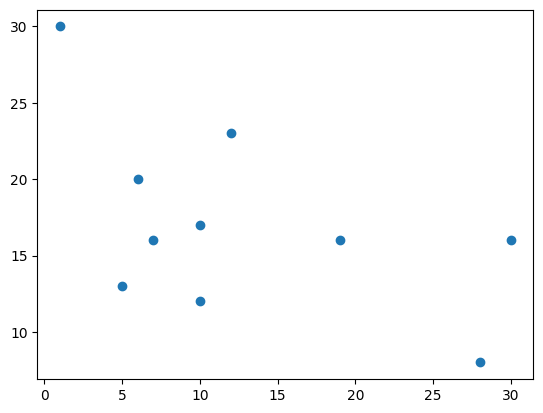

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.scatter(x,y)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [45.0, 45.0, 64.375, 64.375],
  [35.0, 35.0, 54.6875, 54.6875],
  [20.0, 20.0, 44.84375, 44.84375],
  [5.0, 5.0, 32.421875, 32.421875]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 3.605551275463989, 3.605551275463989, 3.1622776601683795],
  [0.0, 4.123105625617661, 4.123105625617661, 3.605551275463989],
  [0.0, 5.0, 5.0, 4.123105625617661],
  [0.0, 6.324555320336759, 6.324555320336759, 5.0],
  [0.0, 9.055385138137417, 9.055385138137417, 6.324555320336759],
  [8.246211251235321, 11.0, 11.0, 9.055385138137417],
  [0.0, 11.180339887498949, 11.180339887498949, 11.0]],
 'ivl': [8, 6, 7, 5, 2, 1, 9, 3, 4, 10],
 'leaves': [7, 5, 6, 4, 1, 0, 8, 2, 3, 9],
 'color_list': ['C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0',
  'C0',
  

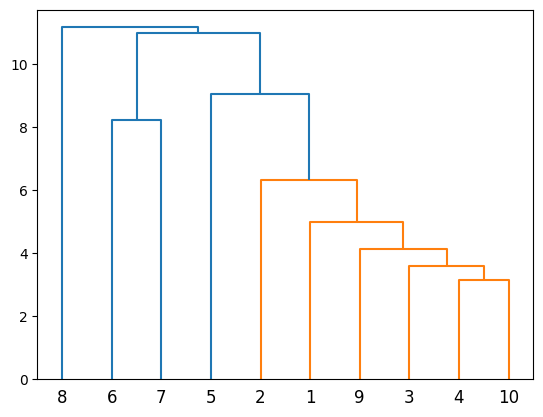

In [15]:
dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))]), 
    labels=range(1, len(x)+1)
)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [45.0, 45.0, 64.375, 64.375],
  [35.0, 35.0, 54.6875, 54.6875],
  [20.0, 20.0, 44.84375, 44.84375],
  [5.0, 5.0, 32.421875, 32.421875]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 3.605551275463989, 3.605551275463989, 3.1622776601683795],
  [0.0, 4.123105625617661, 4.123105625617661, 3.605551275463989],
  [0.0, 5.0, 5.0, 4.123105625617661],
  [0.0, 6.324555320336759, 6.324555320336759, 5.0],
  [0.0, 9.055385138137417, 9.055385138137417, 6.324555320336759],
  [8.246211251235321, 11.0, 11.0, 9.055385138137417],
  [0.0, 11.180339887498949, 11.180339887498949, 11.0]],
 'ivl': [8, 6, 7, 5, 2, 1, 9, 3, 4, 10],
 'leaves': [7, 5, 6, 4, 1, 0, 8, 2, 3, 9],
 'color_list': ['C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0',
  'C0',
  

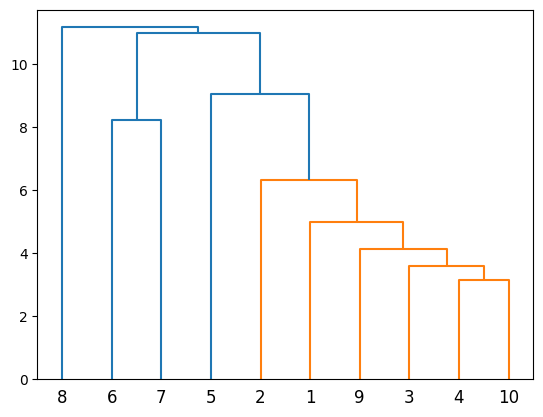

In [16]:
#nearest point arlgorithm

dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))], method='single'), 
    labels=range(1, len(x)+1)
)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [53.75, 53.75, 90.0, 90.0],
  [35.0, 35.0, 71.875, 71.875],
  [12.5, 12.5, 53.4375, 53.4375]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 12.041594578792296, 12.041594578792296, 8.246211251235321],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 5.0, 5.0, 3.1622776601683795],
  [0.0, 6.4031242374328485, 6.4031242374328485, 5.0],
  [0.0, 6.708203932499369, 6.708203932499369, 0.0],
  [6.4031242374328485,
   12.206555615733702,
   12.206555615733702,
   6.708203932499369],
  [0.0, 20.12461179749811, 20.12461179749811, 12.206555615733702],
  [12.041594578792296,
   34.828149534535996,
   34.828149534535996,
   20.12461179749811]],
 'ivl': [5, 6, 7, 8, 3, 1, 4, 10, 2, 9],
 'leaves': [4, 5, 6, 7, 2, 0, 3, 9, 1, 8],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2'

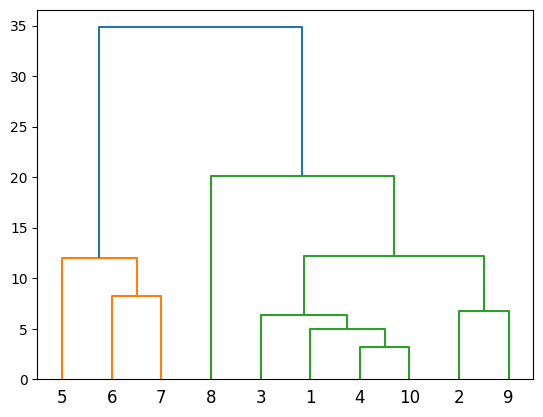

In [17]:
#farthest point

dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))], method='complete'), 
    labels=range(1, len(x)+1)
)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [45.0, 45.0, 76.25, 76.25],
  [35.0, 35.0, 60.625, 60.625],
  [25.0, 25.0, 47.8125, 47.8125],
  [10.0, 10.0, 36.40625, 36.40625]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 4.561552812808831, 4.561552812808831, 3.1622776601683795],
  [0.0, 5.0990195135927845, 5.0990195135927845, 0.0],
  [4.561552812808831,
   6.004002539126912,
   6.004002539126912,
   5.0990195135927845],
  [0.0, 9.004396004622283, 9.004396004622283, 6.004002539126912],
  [0.0, 11.453838241426164, 11.453838241426164, 9.004396004622283],
  [0.0, 16.5220069580754, 16.5220069580754, 11.453838241426164],
  [8.246211251235321, 22.11760352058819, 22.11760352058819, 16.5220069580754]],
 'ivl': [6, 7, 8, 5, 2, 9, 4, 10, 1, 3],
 'leaves': [5, 6, 7, 4, 1, 8, 3, 9, 0, 2],
 'color_list': ['C1', 'C2', '

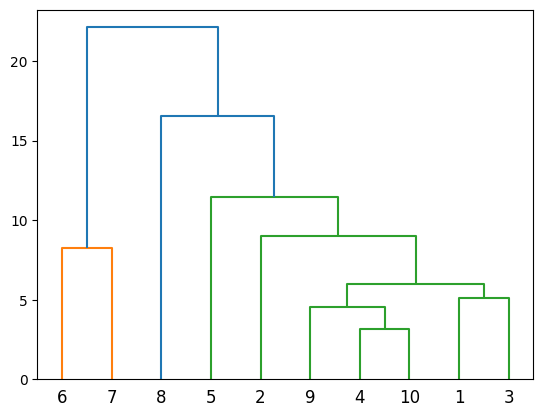

In [18]:
#UPGMA 평균거리 계산

dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))], method='average'), 
    labels=range(1, len(x)+1)
)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [45.0, 45.0, 76.25, 76.25],
  [35.0, 35.0, 60.625, 60.625],
  [20.0, 20.0, 47.8125, 47.8125],
  [5.0, 5.0, 33.90625, 33.90625]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 4.561552812808831, 4.561552812808831, 3.1622776601683795],
  [0.0, 5.0990195135927845, 5.0990195135927845, 0.0],
  [4.561552812808831,
   6.504919369578263,
   6.504919369578263,
   5.0990195135927845],
  [0.0, 9.389634932355428, 9.389634932355428, 6.504919369578263],
  [0.0, 10.986727711165408, 10.986727711165408, 9.389634932355428],
  [8.246211251235321,
   16.53331388102994,
   16.53331388102994,
   10.986727711165408],
  [0.0, 26.097419583790625, 26.097419583790625, 16.53331388102994]],
 'ivl': [8, 6, 7, 5, 2, 9, 4, 10, 1, 3],
 'leaves': [7, 5, 6, 4, 1, 8, 3, 9, 0, 2],
 'color_list': 

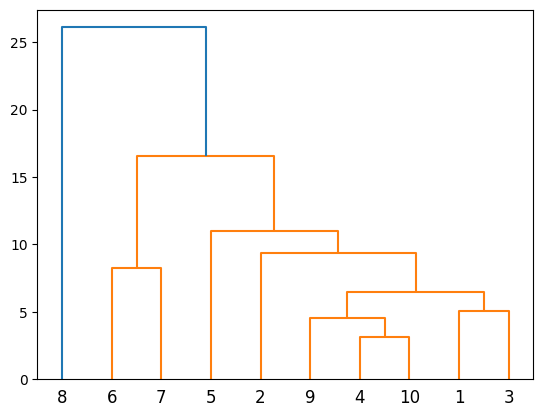

In [19]:
#WPGMA 상위군집 하위군집 평균값 비교

dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))], method='weighted'), 
    labels=range(1, len(x)+1)
)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [45.0, 45.0, 76.25, 76.25],
  [35.0, 35.0, 60.625, 60.625],
  [25.0, 25.0, 47.8125, 47.8125],
  [10.0, 10.0, 36.40625, 36.40625]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 4.301162633521313, 4.301162633521313, 3.1622776601683795],
  [0.0, 5.0990195135927845, 5.0990195135927845, 0.0],
  [4.301162633521313,
   5.169354139756941,
   5.169354139756941,
   5.0990195135927845],
  [0.0, 8.609297300012354, 8.609297300012354, 5.169354139756941],
  [0.0, 10.699169230469357, 10.699169230469357, 8.609297300012354],
  [0.0, 15.967441362769097, 15.967441362769097, 10.699169230469357],
  [8.246211251235321,
   21.22976978207724,
   21.22976978207724,
   15.967441362769097]],
 'ivl': [6, 7, 8, 5, 2, 9, 4, 10, 1, 3],
 'leaves': [5, 6, 7, 4, 1, 8, 3, 9, 0, 2],
 'color_list':

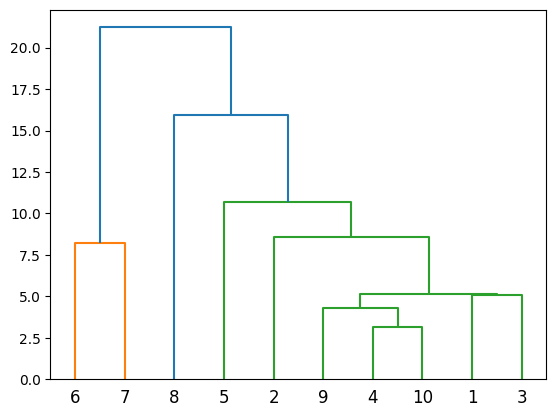

In [20]:
#UPGMC 모든 값을 평균거리

dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))], method='centroid'), 
    labels=range(1, len(x)+1)
)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [56.25, 56.25, 90.0, 90.0],
  [25.0, 25.0, 73.125, 73.125],
  [10.0, 10.0, 49.0625, 49.0625]],
 'dcoord': [[0.0, 8.246211251235321, 8.246211251235321, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 0.0],
  [0.0, 4.96655480858378, 4.96655480858378, 3.1622776601683795],
  [0.0, 5.0990195135927845, 5.0990195135927845, 0.0],
  [4.96655480858378, 8.0083289975708, 8.0083289975708, 5.0990195135927845],
  [0.0, 9.899494936611665, 9.899494936611665, 0.0],
  [8.0083289975708, 14.891992095466225, 14.891992095466225, 9.899494936611665],
  [0.0, 21.122939459946654, 21.122939459946654, 14.891992095466225],
  [8.246211251235321,
   37.97696670351649,
   37.97696670351649,
   21.122939459946654]],
 'ivl': [6, 7, 8, 9, 4, 10, 1, 3, 2, 5],
 'leaves': [5, 6, 7, 8, 3, 9, 0, 2, 1, 4],
 'color_list': ['C1', 'C2', 'C2', 'C2', 

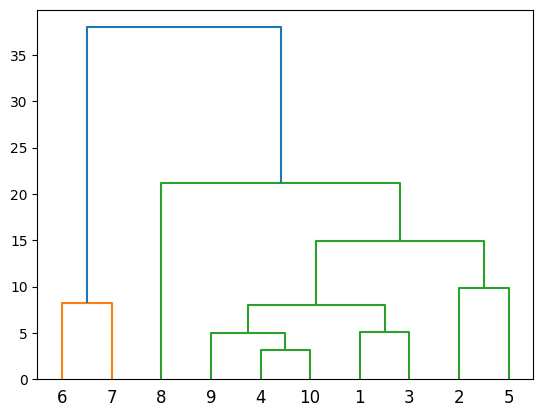

In [21]:
#incremental algorithm 군집간의 분산 최소화

dendrogram(
    linkage([(x[i], y[i]) for i in range(len(x))], method='ward'), 
    labels=range(1, len(x)+1)
)